# ============================================================
# File Name: data_quality_report.ipynb
# Description:
#   This notebook generates a detailed data quality report using Python,
#   including missing value checks, distributions, and correlation analysis.
#
# Purpose:
#   To assess the integrity, completeness, and structure of a dataset
#   before preprocessing, feature engineering, or model development.
#
# Challenges:
#   Identifying potential quality issues, visualizing defects clearly,
#   and ensuring the dataset is suitable for downstream analytical tasks.
# ============================================================

In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes_prediction_dataset.csv")

# quick checks
print(df.shape)
display(df.head())
df.info()


(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [44]:
df.loc[df.gender == "Female", 'gender'] = 0
df.loc[df.gender == "Male", 'gender'] = 1
df.loc[df.gender == "Other", 'gender'] = 2

df.loc[df.smoking_history == "not current", 'smoking_history'] = 0
df.loc[df.smoking_history == "former", 'smoking_history'] = 1
df.loc[df.smoking_history == "No Info", 'smoking_history'] = 2
df.loc[df.smoking_history == "current", 'smoking_history'] = 3
df.loc[df.smoking_history == "never", 'smoking_history'] = 4
df.loc[df.smoking_history == "ever", 'smoking_history'] = 5

df['smoking_history'] = df['smoking_history'].astype(int)
df['gender'] = df['gender'].astype(int)

#not current,former,No Info,current,never and ever

In [45]:
# missing values (counts + percent)
missing_count = df.isnull().sum()

print(pd.concat([missing_count], axis=1).rename(columns={0:"missing_count",1:"missing_pct"}))

# duplicates
print("Duplicate rows:", df.duplicated().sum())


                     missing_count
gender                           0
age                              0
hypertension                     0
heart_disease                    0
smoking_history                  0
bmi                              0
HbA1c_level                      0
blood_glucose_level              0
diabetes                         0
Duplicate rows: 3854


In [46]:
# list columns / dtypes
print(df.dtypes)

# detect possible target columns (heuristic)
possible_targets = [c for c in df.columns if 'diabet' in c.lower() or 'target' in c.lower()]
print("Possible target cols:", possible_targets)

# show distribution for target(s)
for t in possible_targets:
    print(t, df[t].value_counts(dropna=False))


gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
Possible target cols: ['diabetes']
diabetes diabetes
0    91500
1     8500
Name: count, dtype: int64


In [47]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
desc = df[num_cols].describe().T
display(desc)


,count,mean,std,min,25%,50%,75%,max
gender,100000.0,0.414660,0.493031,0.00,0.00,0.00,1.00,2.00
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
smoking_history,100000.0,2.692420,1.314911,0.00,2.00,2.00,4.00,5.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


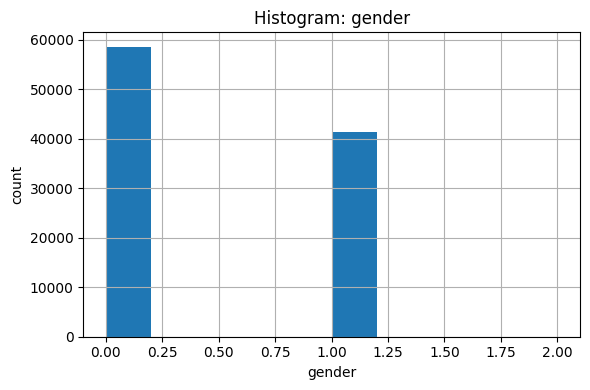

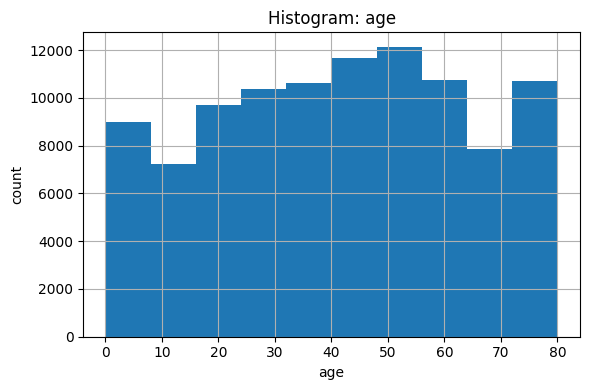

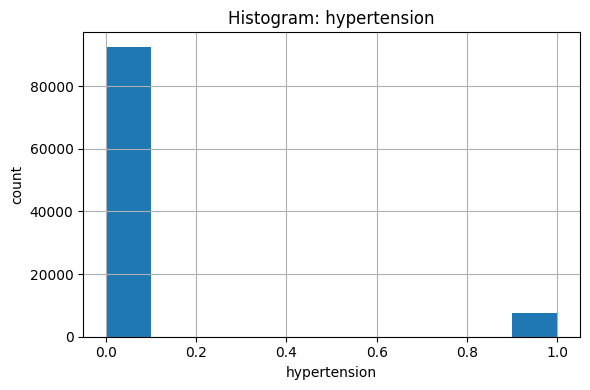

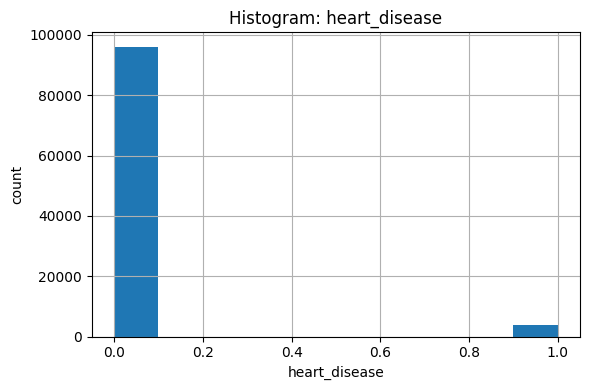

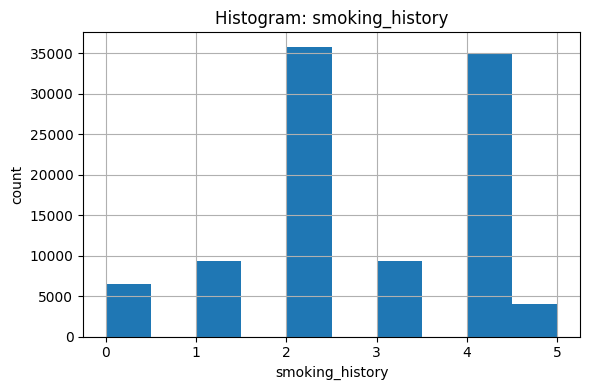

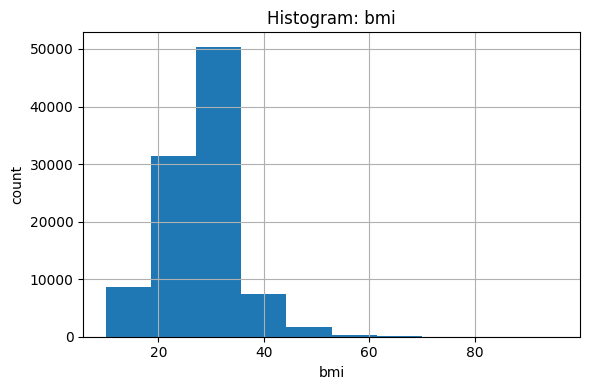

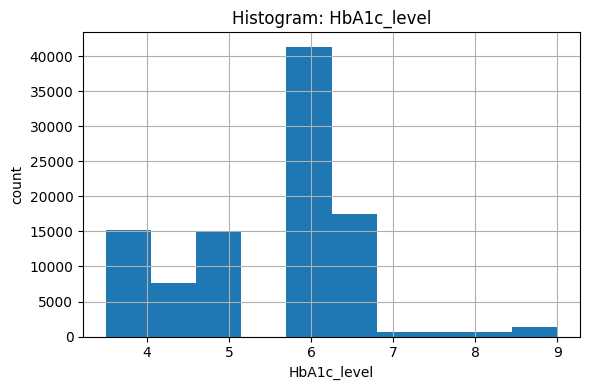

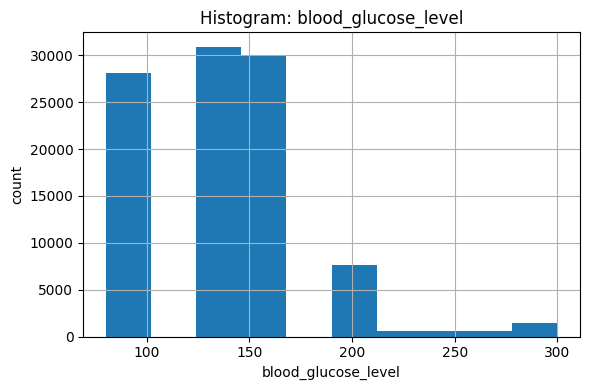

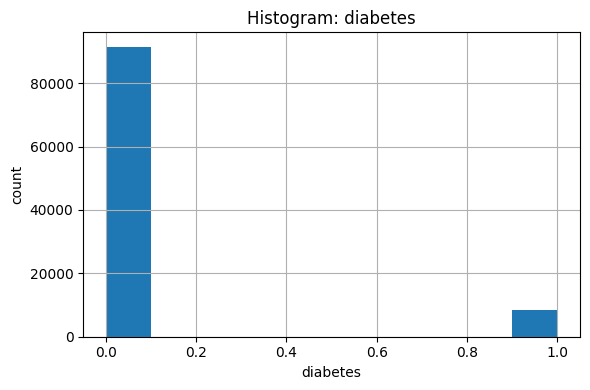

In [48]:
import matplotlib.pyplot as plt
import os
os.makedirs("/mnt/data/eda_plots", exist_ok=True)



for col in num_cols:
    plt.figure(figsize=(6,4))
    df[col].dropna().hist()   # use matplotlib histogram
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.tight_layout()
    plt.savefig(f"/mnt/data/eda_plots/hist_{col}.png")
    plt.show()
    plt.close()
    



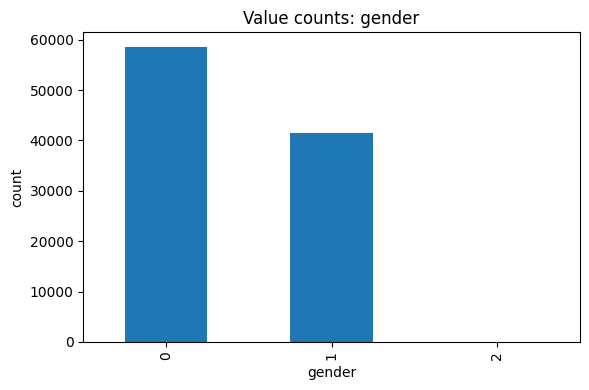

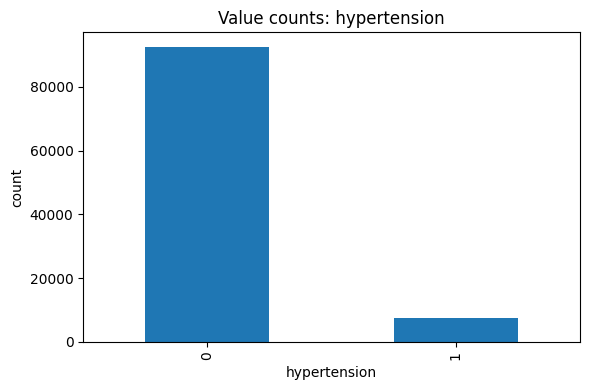

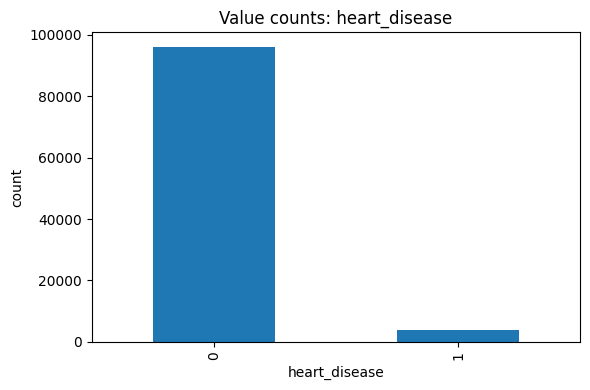

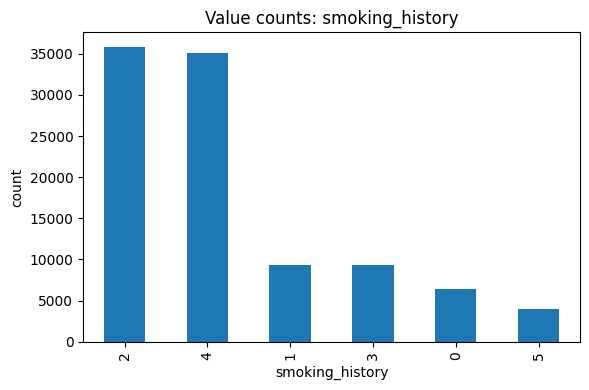

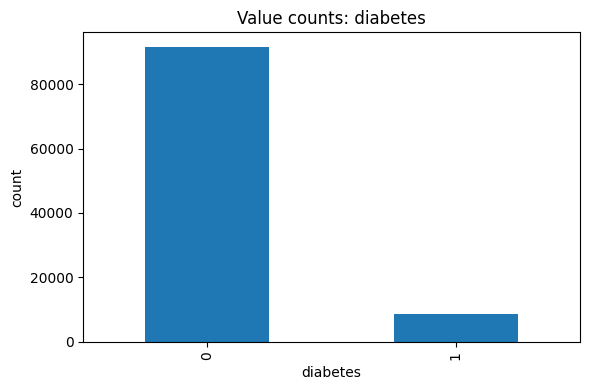

In [49]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()  # if any
# if numeric columns are actually categories (e.g., 0/1/2), treat them similarly
# Example (treat columns with small unique counts as categorical)
small_card_cols = [c for c in df.columns if df[c].nunique() < 10]
for col in small_card_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot.bar()
    plt.title(f"Value counts: {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.tight_layout()
    plt.savefig(f"/mnt/data/eda_plots/bar_{col}.png")
    plt.show()
    plt.close()


In [50]:
outlier_summary = []
for col in num_cols:
    s = df[col].dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_lower = (s < lower).sum()
    n_upper = (s > upper).sum()
    outlier_summary.append({
        "feature": col,
        "n_nonnull": s.shape[0],
        "n_lower_outliers": int(n_lower),
        "n_upper_outliers": int(n_upper),
        "pct_lower_outliers": float(n_lower / s.shape[0] * 100),
        "pct_upper_outliers": float(n_upper / s.shape[0] * 100)
    })
outlier_df = pd.DataFrame(outlier_summary).sort_values(by="pct_upper_outliers", ascending=False)
display(outlier_df)


,feature,n_nonnull,n_lower_outliers,n_upper_outliers,pct_lower_outliers,pct_upper_outliers
8,diabetes,100000,0,8500,0.000,8.500
2,hypertension,100000,0,7485,0.000,7.485
5,bmi,100000,1121,5965,1.121,5.965
3,heart_disease,100000,0,3942,0.000,3.942
7,blood_glucose_level,100000,0,2038,0.000,2.038
6,HbA1c_level,100000,0,1315,0.000,1.315
0,gender,100000,0,0,0.000,0.000
4,smoking_history,100000,0,0,0.000,0.000
1,age,100000,0,0,0.000,0.000


In [ ]:
dq_report = pd.DataFrame({
    "feature": df.columns,
    "dtype": [str(t) for t in df.dtypes],
    "n_missing": df.isnull().sum().values,
    "pct_missing": (df.isnull().mean() * 100).values,
    "n_unique": df.nunique().values,
})
dq_report = dq_report.merge(outlier_df[['feature','n_lower_outliers','n_upper_outliers','pct_lower_outliers','pct_upper_outliers']],
                            on='feature', how='left')
dq_report.to_csv("data_quality_report.csv", index=False)


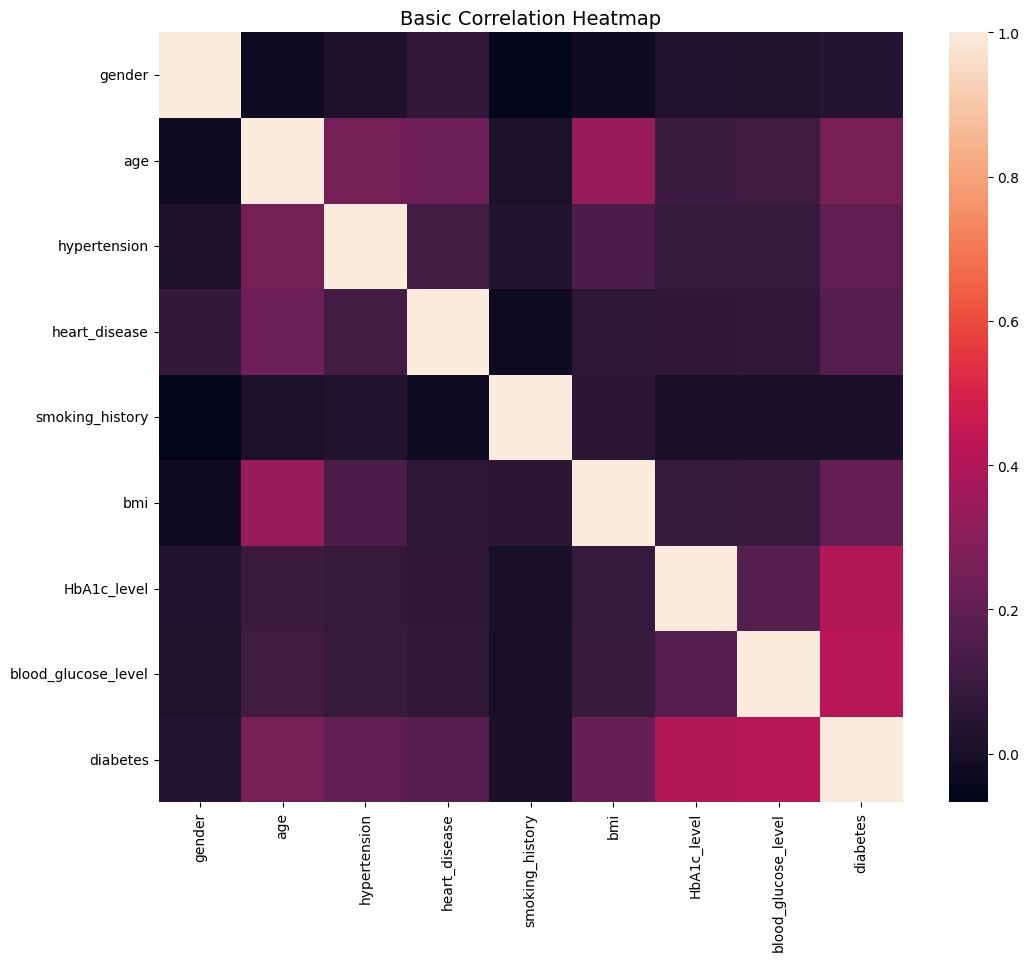

In [54]:
import seaborn as sns
corr = df.corr()  # Pearson correlation by default

plt.figure(figsize=(12, 10))
sns.heatmap(corr)
plt.title("Basic Correlation Heatmap", fontsize=14)
plt.show()



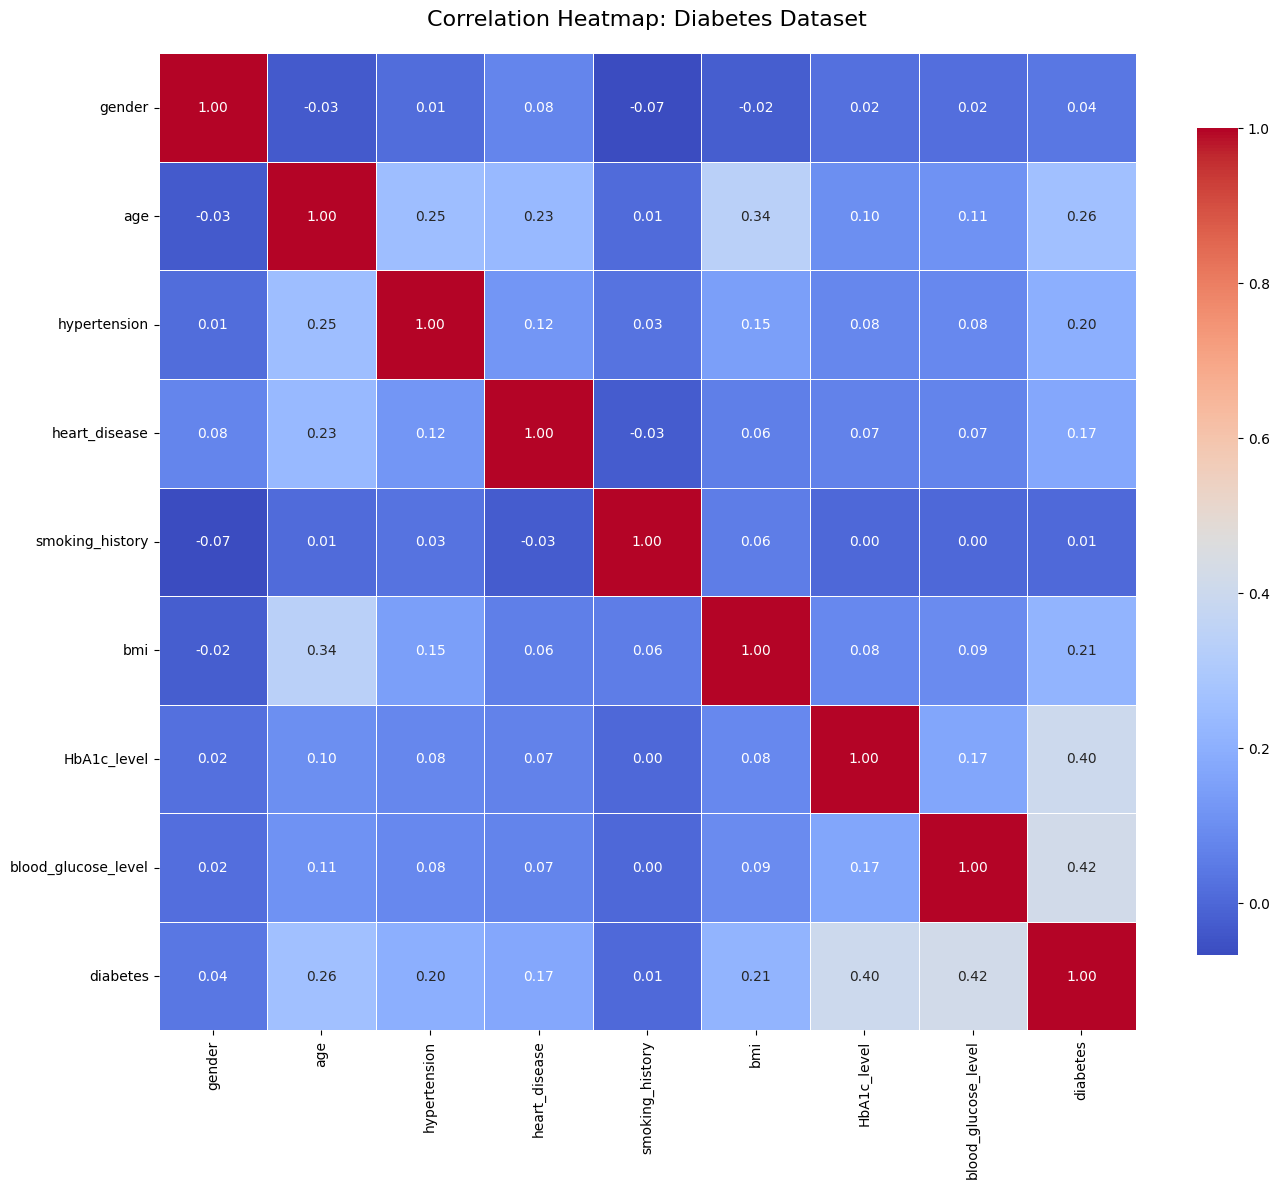

In [53]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    cmap="coolwarm",         # color scheme (you can also try 'viridis', 'plasma', 'RdBu', etc.)
    annot=True,              # write correlation values inside the cells
    fmt=".2f",               # round to 2 decimals
    linewidths=0.5,          # thin lines between cells
    square=True,             # make cells square
    cbar_kws={"shrink": 0.8} # control colorbar size
)
plt.title("Correlation Heatmap: Diabetes Dataset", fontsize=16, pad=20)
plt.tight_layout()
plt.show()
